In [8]:
import numpy as np
from ase.io import read, write
from ase import Atoms
from ase.spacegroup.symmetrize import FixSymmetry
from calorine.calculators import CPUNEP
from calorine.tools import get_force_constants, relax_structure
from pandas import DataFrame
from phonopy.units import THzToCm
from seekpath import get_explicit_k_path
import phonopy
from ase.constraints import UnitCellFilter
from ase.optimize import BFGS
from matplotlib import pyplot as plt
import warnings
import mplpub
mplpub.setup(template='acs')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [9]:
def get_structure(phonon):
    structure_ph = phonon.primitive
    structure_ase = Atoms(symbols=structure_ph.symbols, cell=structure_ph.cell,
                          scaled_positions=structure_ph.scaled_positions, pbc=True)
    return structure_ase

# Pnma

### NEP setup  

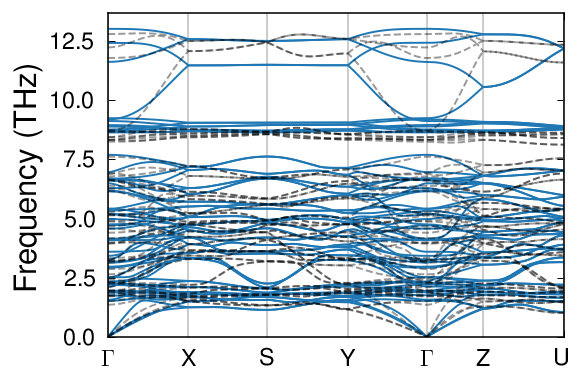

In [30]:
structure = read('BaZrS3-spg62-Pnma.xyz')
calculator = CPUNEP('nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0001)

phonon = get_force_constants(structure, calculator, [2, 2, 2])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)

path = "GXSYGZU"
special_points = dict(
    G = [0,0,0],
    R = [1/2, 1/2, 1/2],
    S = [1/2, 1/2, 0],
    T = [0, 1/2, 1/2],
    U = [1/2, 0, 1/2],
    X = [1/2, 0, 0],
    Y = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

phonon_DFT = phonopy.load("DFT_BaZrS3_tilt_62.yaml")
phonon_DFT.run_band_structure(path_list)
band_DFT = phonon.get_band_structure_dict()
phonopy_paths_DFT, phonopy_dists_DFT, phonopy_freqs_DFT, *_ = phonon_DFT.get_band_structure()

fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs_DFT), color='black', alpha = 0.4, linestyle='--')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)
fig.savefig('Pnma_DFT_vs_NEP.png', bbox_inches='tight')

# I4/mcm

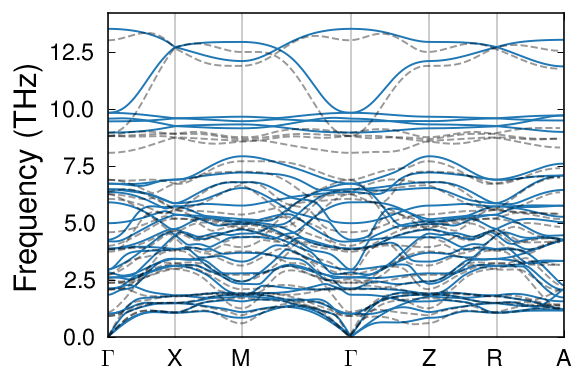

In [29]:
structure = read('BaZrS3-spg140-I4mcm.xyz')
calculator = CPUNEP('nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.000001, constant_cell = True)

phonon = get_force_constants(structure, calculator, [4,4,4])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)

path = "GXMGZRA"
special_points = dict(
    G = [0,0,0],
    A = [1/2, 1/2, 1/2],
    M = [1/2, 1/2, 0],
    R = [0, 1/2, 1/2],
    X = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

phonon_DFT = phonopy.load("DFT_BaZrS3_tilt_140.yaml")
phonon_DFT.run_band_structure(path_list)
band_DFT = phonon.get_band_structure_dict()
phonopy_paths_DFT, phonopy_dists_DFT, phonopy_freqs_DFT, *_ = phonon_DFT.get_band_structure()

fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:blue')
ax.plot(np.hstack(phonopy_dists_DFT), np.vstack(phonopy_freqs_DFT), color='black', alpha = 0.4, linestyle='--')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)
fig.savefig('I4_mcm_DFT_vs_NEP.png', bbox_inches='tight')

# Pm-3m 

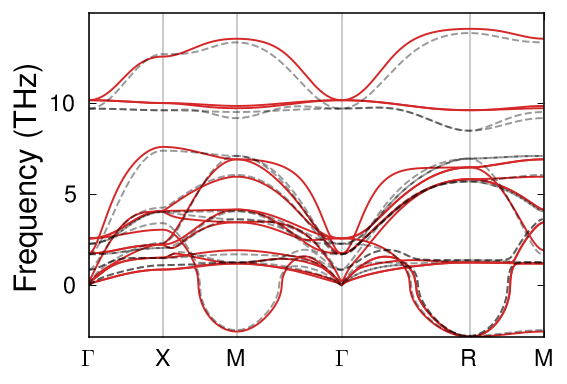

In [28]:
structure = read('BaZrS3-spg221-Pm3m.xyz')
calculator = CPUNEP('nep.txt')
structure.calc = calculator
structure.set_constraint(FixSymmetry(structure))
relax_structure(structure, fmax=0.0000001, constant_cell=True)

phonon = get_force_constants(structure, calculator, [4,4,4])
structure_tuple = (structure.cell, structure.get_scaled_positions(), structure.numbers)

path = "GXMGRM"
special_points = dict(
    G = [0,0,0],
    M = [1/2, 1/2, 0],
    R = [1/2, 1/2, 1/2],
    X = [0, 1/2, 0]
)

path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

phonon_DFT = phonopy.load("DFT_BaZrS3_tilt_221.yaml")
phonon_DFT.run_band_structure(path_list)
band_DFT = phonon.get_band_structure_dict()
phonopy_paths_DFT, phonopy_dists_DFT, phonopy_freqs_DFT, *_ = phonon_DFT.get_band_structure()

fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=16)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:red')
ax.plot(np.hstack(phonopy_dists_DFT), np.vstack(phonopy_freqs_DFT), color='black', alpha = 0.4, linestyle='--')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)
fig.savefig('Pm3m_DFT_vs_NEP.png', bbox_inches='tight')